# jammer
## 05- `star_marley.py` 
### I. Run01


In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/2M_J0050/output/marley_grid/run01/temp_emcee_chain.npy")

In [3]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

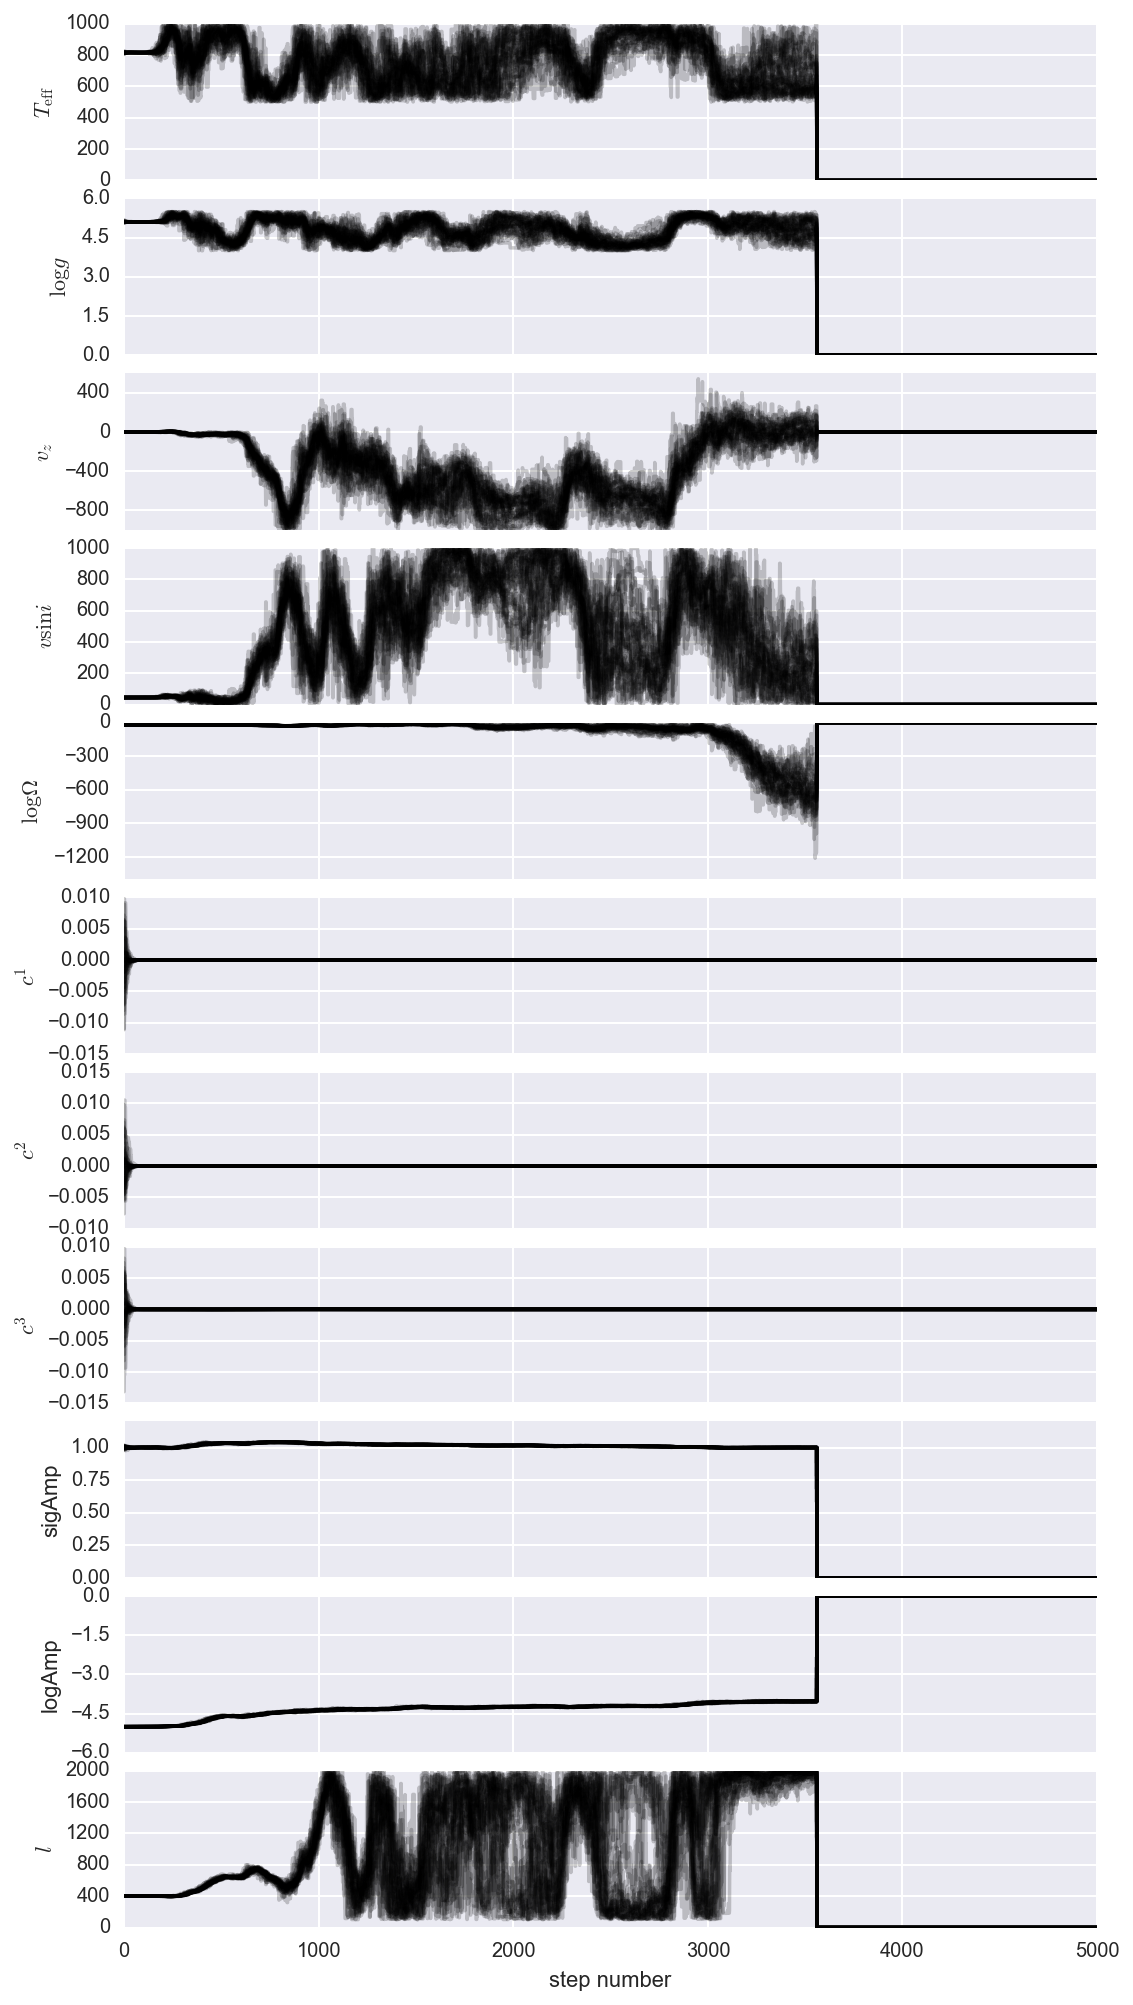

In [6]:
fig, axes = plt.subplots(11, 1, sharex=True, figsize=(8, 14))
for i in range(0, 11, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[10].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [7]:
ws[0,3300,:]

array([  6.67769356e+02,   5.10108925e+00,  -2.18299447e+02,
         1.37108135e+02,  -5.12921363e+02,   1.84808524e-06,
         2.07324752e-06,  -4.46101698e-07,   1.00102211e+00,
        -4.02436777e+00,   1.81199856e+03])

Something is wrong!  Let's look at the spectrum.

In [8]:
dat1 = pd.read_csv('../sf/2M_J0050/output/marley_grid/run01/spec_config.csv')
dat2 = pd.read_csv('../sf/2M_J0050/output/marley_grid/run01/models_draw.csv')

In [9]:
dat1.head()

,data,wl,model_composite
0,6.830180e-17,10064.7,1.512003e-17
1,8.942670e-17,10181.4,2.156373e-17
2,1.053440e-16,10299.4,2.928716e-17
3,1.275075e-16,10418.4,3.921205e-17
4,1.466903e-16,10538.5,4.719285e-17


In [10]:
dat2.head()

,data,wl,model_comp50,model_cool50
0,6.830180e-17,10064.7,2.672011e-269,2.672011e-269
1,8.942670e-17,10181.4,3.401365e-269,3.401365e-269
2,1.053440e-16,10299.4,4.623729e-269,4.623729e-269
3,1.275075e-16,10418.4,6.229082e-269,6.229082e-269
4,1.466903e-16,10538.5,8.287174e-269,8.287174e-269


In [11]:
sns.set_style('ticks')

In [12]:
!mkdir ../results

mkdir: ../results: File exists


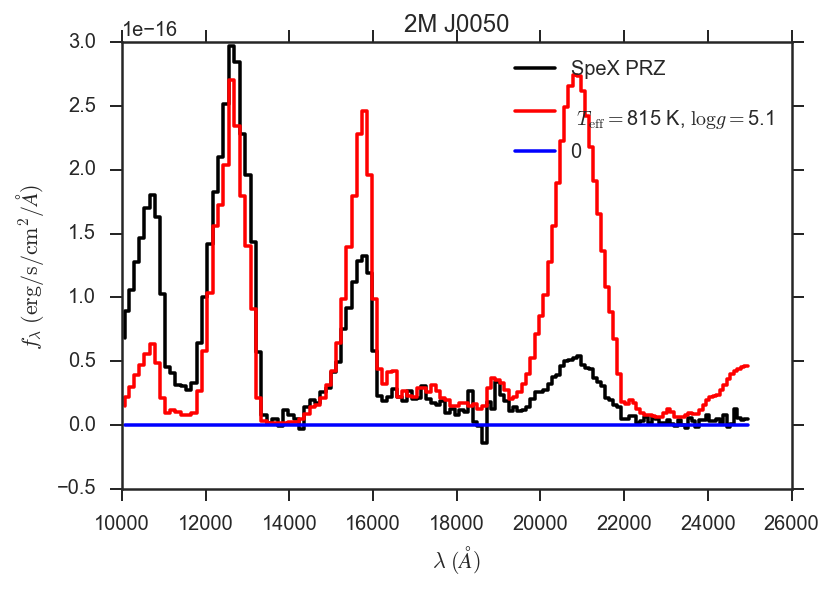

In [13]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$815 K, $\log{g}=$5.1')
plt.step(dat2.wl, dat2.model_comp50, 'b', label='0')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('2M J0050')
plt.legend(loc='best')
plt.savefig('../results/2M_J0050_poor_fit.png', dpi=300, bbox_inches='tight')

In [14]:
np.sum((dat1.data-dat1.model_composite)**2), np.sum((dat2.data-dat2.model_comp50)**2)

(6.1657678590571827e-31, 7.5241905484709768e-31)

The $\chi^2$ is approximately the same between a flat line at zero, and an real brown dwarf spectrum.

## Next steps:

- Double check the conversion between spectral flux density in $1/Hz$ and $1/Angstrom.$-- incorrectly boosting flux?
- Assess the effect of spectral resolution gradient since $R\in (75, 200)$ smoothes differently across band.
- Assess possibility of missing physics